## Read et Plot European Centre for Disease Prevention and Control
### An agency of the European Union

**Petit script permettant de charger avec Panda la dernière version du fichier fournit sur [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) et production de quelques plots pour vérification.**

In [1]:
import pandas as pd

## Lecture et sélection des données

Lecture des données et sélectioner la colonne 'dateRep' comme index 

In [2]:
url="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
covid_orig=pd.read_csv(url, sep=',', parse_dates=[0], dayfirst=True)

#covid_orig.dtypes
covid_orig.set_index('dateRep', inplace=True)
covid_orig.sort_index(inplace=True)
covid_orig.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Lebanon,LB,LBN,6848925.0,Asia
2019-12-31,31,12,2019,0,0,South_Korea,KR,KOR,51635256.0,Asia
2019-12-31,31,12,2019,0,0,Vietnam,VN,VNM,95540395.0,Asia
2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19473936.0,Europe
2019-12-31,31,12,2019,0,0,Greece,EL,GRC,10727668.0,Europe


On set 'dateRep' comme index et on enleve les colonnes qui ne nous intéressent pas. 
Puis on somme les données sur tous les départements pour avoir des résultats sur la france entière

In [3]:
covid_orig.drop(columns=['day', 'year', 'month', 'geoId', 'countryterritoryCode'], inplace=True)
covid_orig.head()

,cases,deaths,countriesAndTerritories,popData2018,continentExp
dateRep,,,,,
2019-12-31,0,0,Lebanon,6848925.0,Asia
2019-12-31,0,0,South_Korea,51635256.0,Asia
2019-12-31,0,0,Vietnam,95540395.0,Asia
2019-12-31,0,0,Romania,19473936.0,Europe
2019-12-31,0,0,Greece,10727668.0,Europe


On sélectionne la france

In [4]:
covid_france = covid_orig.loc[covid_orig['countriesAndTerritories'] == 'France']
#covid_france.dtypes
#covid_france.tail()
covid_france1 = covid_france[['cases', 'deaths']].cumsum()
covid_france1.tail()

,cases,deaths
dateRep,,
2020-05-04,131287,24895
2020-05-05,131863,25201
2020-05-06,132967,25531
2020-05-07,137150,25809
2020-05-08,137779,25987


In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/MacBook_Derrode/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


On sélectionne l'Europe

In [6]:
# covid_europe  = covid_orig.loc[covid_orig['continentExp'] == 'Europe']
# covid_europe1 = covid_europe.groupby(covid_europe.index)[['cases', 'deaths','popData2018']].sum()
# #covid_europe1.tail()
# covid_europe2 = covid_europe1[['cases', 'deaths']].cumsum()
# covid_europe2.tail()
# ax_europe=covid_europe2.plot(figsize=(16, 4), title='Europe')

### Régression linéaire

In [7]:
datemin='2020-02-25'
dateconf='2020-03-15'
datemax='2020-03-29' # papier Bacaër
covid_france1['log_cases']  = np.log(covid_france1['cases'])
covid_france1['log_deaths'] = np.log(covid_france1['deaths'])
logcases_datemin = covid_france1.loc[datemin]['log_cases']
logcases_dateconf = covid_france1.loc[dateconf]['log_cases']

/Users/MacBook_Derrode/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


2020-03-16 00:00:00 <class 'str'>
2020-03-29 <class 'str'>
0.14694892829192246
4.716925727984682


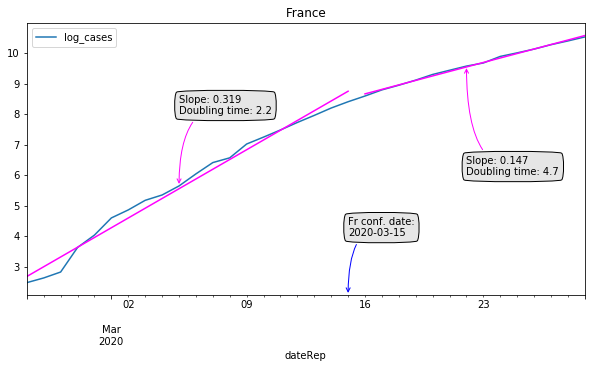

In [8]:
# sélectionne une partie des données
from datetime import datetime

#Plot the data
excerpt_france = covid_france1.loc[datemin:datemax]
ax_france=excerpt_france.plot(y=['log_cases'], figsize=(10, 5), title='France')
ax_france.annotate('Fr conf. date:\n'+dateconf, xy=(dateconf, ax_france.get_ylim()[0]), xycoords='data', xytext=(dateconf, 4), bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", color='blue', connectionstyle="angle3,angleA=0,angleB=-90"));

#Plot the regression before
excerpt_france1 = covid_france1.loc[datemin:dateconf]
Xa_before = (excerpt_france1.index - excerpt_france1.index[0]).days.values
ya_before = excerpt_france1['log_cases'].values
m_before, b_before = np.polyfit(Xa_before, ya_before, 1)
ax_france.plot([excerpt_france1.index[0], excerpt_france1.index[-1]], [m_before*Xa_before[0] + b_before, m_before*Xa_before[-1] + b_before], color='magenta');

d1 = datetime.strptime(datemin,"%Y-%m-%d")
d2 = datetime.strptime(dateconf,"%Y-%m-%d")
d = d1.date() + (d2.date()-d1.date()) / 2
ax_france.annotate('Slope: '+"%.3f"%(m_before)+"\nDoubling time: "+"%.1f"%(np.log(2)/m_before), xy=(d, excerpt_france1['log_cases'][d]), xycoords='data', xytext=(d, 8), bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", color='magenta', connectionstyle="angle3,angleA=0,angleB=-90"));

#Plot the regression before
from datetime import timedelta
dateconf_p1 = str(datetime.strptime(dateconf,"%Y-%m-%d")+pd.DateOffset(1))
print(dateconf_p1, type(dateconf_p1))
print(datemax, type(datemax))
excerpt_france2 = covid_france1.loc[dateconf_p1:datemax]
Xa_after = (excerpt_france2.index - excerpt_france2.index[0]).days.values
ya_after = excerpt_france2['log_cases'].values
m_after, b_after = np.polyfit(Xa_after, ya_after, 1)
ax_france.plot([excerpt_france2.index[0], excerpt_france2.index[-1]], [m_after*Xa_after[0] + b_after, m_after*Xa_after[-1] + b_after], color='magenta');

d1 = datetime.strptime(dateconf_p1,'%Y-%m-%d %H:%M:%S')
d2 = datetime.strptime(datemax,"%Y-%m-%d")
d = d1.date() + (d2.date()-d1.date()) / 2
print(m_after)
print(np.log(2)/m_after)
ax_france.annotate('Slope: '+"%.3f"%(m_after)+"\nDoubling time: "+"%.1f"%(np.log(2)/m_after), xy=(d, excerpt_france2['log_cases'][d]), xycoords='data', xytext=(d, 6), bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", color='magenta', connectionstyle="angle3,angleA=0,angleB=-90"));


### Regression linaire